## Behavioral and demographic data of the sample

Imports

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel
import matplotlib.pyplot as plt
import os
import json
import matplotlib.patches as mpatches

## Read data

Pickled eeg and behavioral data (before and after trail selection)

In [46]:
full_sample_df = pd.read_pickle('../data/current_dataset/full_sample_sonata_dataset.pkl')
# extract ID info to full sample dataset. Cast FLA-XXX to int(XXX)
full_sample_df['ID'] = full_sample_df['ID'].str.split("-").str[1].astype(int)

final_sample_df = pd.read_pickle('../data/current_dataset/sonata_data_standardized.pkl')

Demographic data

In [48]:
demo_df = pd.read_csv('../data/current_dataset/current_dataset_q_data.csv')
demo_df = demo_df.rename(columns={'Demo_kod': 'ID'})
demo_df.head()

,Płeć,Ręczność,Wiek,Twoja dotychczasowa liczba lat edukacji (w pełnych latach),ID,Intolerance of Uncertainty - Prospective Anxiety,Intolerance of Uncertainty - Inhibitory Anxiety,STAI Trait SUM,BIS,Obsessive-Compulsive FULL,Zdecydowanie-FULL,PSWQ
0,0,1,26,20,0,2.000000,1.6,40,3.3,1.555556,2.8,64
1,0,1,21,15,1,4.857143,4.2,52,3.6,2.222222,3.2,78
2,0,1,19,15,2,3.428571,3.0,50,2.7,3.500000,3.2,60
3,0,1,36,23,3,2.857143,1.0,32,2.0,1.111111,4.8,23
4,0,1,27,18,4,3.857143,3.0,46,3.0,2.333333,3.8,67


## Full sample stats

### 1. Demo statistics

In [49]:
full_sample_with_demo_df = pd.merge(full_sample_df, demo_df, on='ID', how='left')
display(full_sample_with_demo_df[['Ręczność', 'Wiek', 'Twoja dotychczasowa liczba lat edukacji (w pełnych latach)', 'ID']].groupby('ID').agg('mean').describe())

# gender statistics
demo_df[demo_df['ID'].isin(np.unique(full_sample_df['ID'].to_numpy()))]['Płeć'].value_counts()

,Ręczność,Wiek,Twoja dotychczasowa liczba lat edukacji (w pełnych latach)
count,225.000000,225.000000,225.000000
mean,0.897778,23.640000,15.413333
std,0.303616,4.176807,2.400298
min,0.000000,18.000000,9.000000
25%,1.000000,21.000000,14.000000
50%,1.000000,23.000000,15.000000
75%,1.000000,25.000000,17.000000
max,1.000000,39.000000,25.000000


Płeć
0                   113
1                   111
Osoba niebinarna      1
Name: count, dtype: int64

In [50]:
full_sample_df

,trial number,ID,block_type,trial_type,cue_name,target_name,response,rt,reaction,threshold_rt,...,feedback_show_time,feedback_type,event,drop_log,ne_FCz,ne_mean_FCz,ne_Fz,ne_mean_Fz,ne_Cz,ne_mean_Cz
0,1,169,experiment,congruent,NaN,congruent_lll,l,0.268716,correct,0.420000,...,0.8,feedback_good,2,(),-1.392086e-05,-0.000005,-1.047375e-05,-6.156650e-06,-8.702290e-06,-7.819865e-07
1,2,169,experiment,congruent,NaN,congruent_lll,l,0.309487,correct,0.344358,...,0.8,feedback_good,2,(),-2.783326e-06,0.000009,-5.018437e-07,3.766289e-06,-5.263218e-07,8.307203e-06
2,3,169,experiment,incongruent,NaN,incongruent_rlr,l,0.397239,correct,0.309487,...,0.8,feedback_bad,0,(),-3.684688e-06,0.000003,-3.449400e-06,-1.556821e-06,-1.474440e-06,4.761666e-06
3,4,169,experiment,congruent,NaN,congruent_rrr,r,0.309485,correct,0.353363,...,0.8,feedback_good,2,(),7.475740e-07,0.000006,7.906369e-07,4.928352e-06,2.810129e-06,6.712820e-06
4,5,169,experiment,incongruent,NaN,incongruent_lrl,r,0.386673,correct,0.309487,...,0.8,feedback_bad,0,(),-5.791032e-06,-0.000002,-2.980749e-06,-9.579916e-07,-2.809617e-06,-8.727314e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67495,296,170,experiment,incongruent,NaN,incongruent_rlr,r,0.260115,incorrect,0.236557,...,0.8,NaN,1,"(P2,)",-1.820390e-05,-0.000011,-9.048478e-06,-4.820889e-06,-1.676281e-05,-9.223618e-06
67496,297,170,experiment,congruent,NaN,congruent_rrr,r,0.292400,correct,0.236557,...,0.8,feedback_bad,2,"(P2,)",-1.453992e-05,-0.000005,-1.186787e-05,-4.864914e-06,-1.166843e-05,-3.789135e-06
67497,298,170,experiment,incongruent,NaN,incongruent_lrl,r,0.400546,correct,0.236675,...,0.8,feedback_bad,0,"(P2,)",-1.705890e-06,0.000003,-2.590526e-06,1.400951e-06,-1.976733e-06,3.857039e-06
67498,299,170,experiment,congruent,NaN,congruent_lll,l,0.250364,correct,0.236675,...,0.8,feedback_bad,2,"(P2,)",-1.294921e-06,0.000007,-4.050993e-06,3.614124e-06,1.397442e-06,1.153538e-05


### 2. RTs and correctness statistics

In [51]:
full_sample_df['trial_reaction'] = (
        full_sample_df['trial_type'].astype(str) + '_' + full_sample_df['reaction'].astype(str))

participant_level_stats = (
    full_sample_df[['ID', 'trial_type', 'rt', 'reaction']].groupby(['ID', 'trial_type', 'reaction', ]).describe())

group_level_participant_agg_df = participant_level_stats.groupby(['trial_type', 'reaction']).agg(
    {
        ('rt', 'mean'): ["count", "mean", "std"],
        ('rt', 'std'): ["mean", "std"],
        ('rt', 'min'): ["mean", "std",],
        ('rt', 'max'): ["mean", "std",]
    })

print(f"Summary statistics of RT for conditions and accuracy")
display(group_level_participant_agg_df)

grouped_df = full_sample_df[['ID', 'trial_type', 'rt', 'reaction']].groupby(['ID'])
acc_df = pd.DataFrame()
participants_congruent_acc = []
participants_incongruent_acc = []
participants_overall_acc = []

for group_name, group_data in grouped_df:
    inner_group = group_data.groupby(['trial_type', 'reaction'])
    for inner_group_name, inner_group_data in inner_group:
        incongruent_correct = inner_group.get_group(('incongruent', 'correct')).count()["rt"]
        congruent_correct = inner_group.get_group(('congruent', 'correct')).count()["rt"]
        incongruent_incorrect = inner_group.get_group(('incongruent', 'incorrect')).count()["rt"]
        try:
            congruent_incorrect = inner_group.get_group(('congruent', 'incorrect')).count()["rt"]
        except:
            congruent_incorrect = 0

        congruent_acc = congruent_correct / (congruent_correct + congruent_incorrect)
        participants_congruent_acc.append(congruent_acc)
        incongruent_acc = incongruent_correct / (incongruent_correct + incongruent_incorrect)
        participants_incongruent_acc.append(incongruent_acc)
        overall_acc = (congruent_correct + incongruent_correct) / (congruent_correct + congruent_incorrect + incongruent_correct + incongruent_incorrect)
        participants_overall_acc.append(overall_acc)

        this_results = pd.DataFrame({
            'ID': [group_name[0]],
            'accuracy': 'congruent',
            'value': [congruent_acc],
        })

        acc_df = pd.concat([acc_df, this_results], ignore_index=True)

        this_results = pd.DataFrame({
            'ID': [group_name[0]],
            'accuracy': 'incongruent',
            'value': [incongruent_acc],
        })

        acc_df = pd.concat([acc_df, this_results], ignore_index=True)

        this_results = pd.DataFrame({
            'ID': [group_name[0]],
            'accuracy': 'overall',
            'value': [overall_acc],
        })

        acc_df = pd.concat([acc_df, this_results], ignore_index=True)

Summary statistics of RT for conditions and accuracy


rt                                                    \
                       mean                           std                 min   
                      count      mean       std      mean       std      mean   
trial_type  reaction                                                            
congruent   correct     225  0.266978  0.033100  0.052014  0.022268  0.141035   
            incorrect   137  0.222918  0.100562  0.076789  0.057019  0.174405   
incongruent correct     225  0.373722  0.035786  0.064339  0.024502  0.243156   
            incorrect   225  0.234955  0.026614  0.038522  0.026030  0.157425   

                                                     
                                      max            
                            std      mean       std  
trial_type  reaction                                 
congruent   correct    0.051624  0.570705  0.205606  
            incorrect  0.105491  0.287017  0.163982  
incongruent correct    0.084608  0.603705  0.117148  
            incorrect  0.048727  0.328874  0.091351

Plot RT distributions

<Figure size 2400x1000 with 0 Axes>

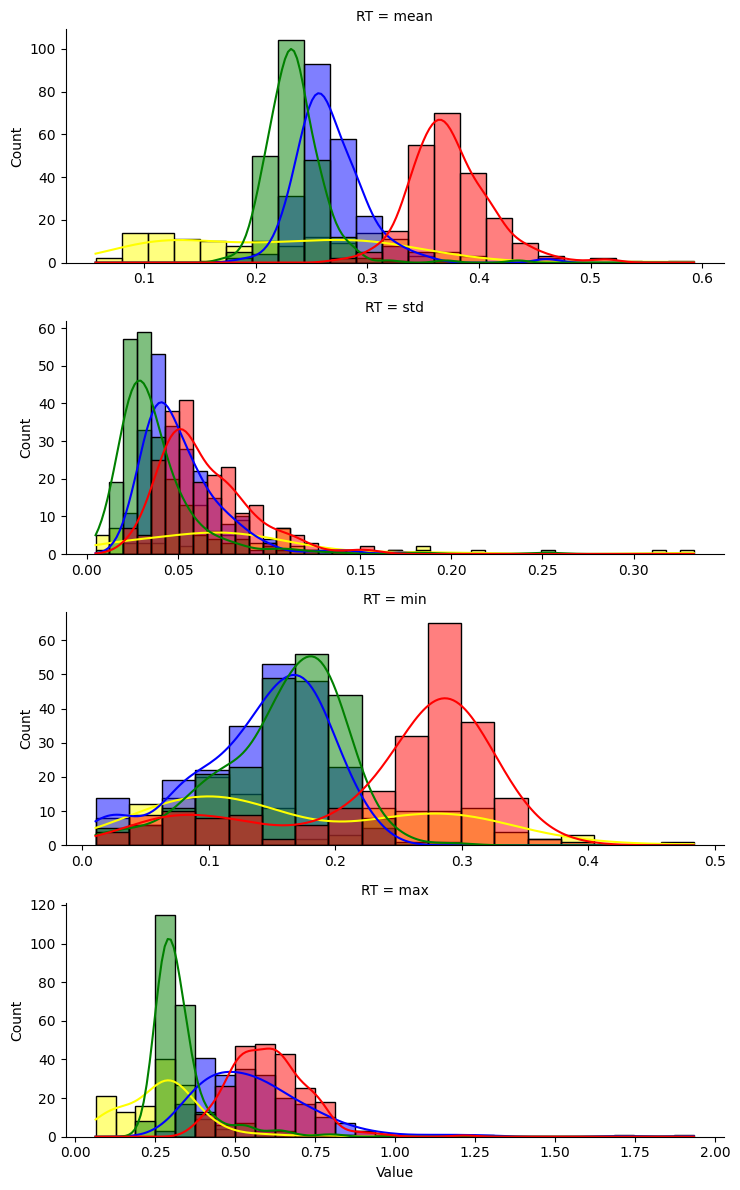

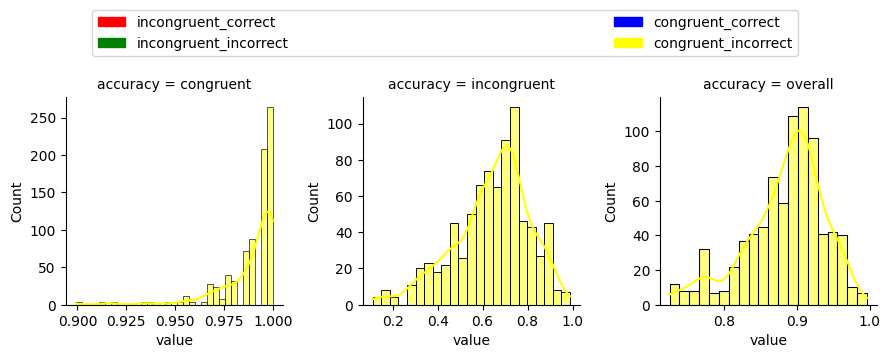

Congruent accuracy: 0.99 (0.02)
Incongruent accuracy: 0.64 (0.17)
Overall accuracy: 0.88 (0.05)


In [52]:
plt.figure(figsize=(24,10))
plt.rcParams['savefig.dpi'] = 300

# Define the custom labels and corresponding colors from `hue_palette`
custom_labels = ["incongruent_correct", "incongruent_incorrect", "congruent_correct", "congruent_incorrect"]
custom_colors = ["red", "green", "blue", "yellow"]

# Create custom legend handles
legend_elements = [
    mpatches.Patch(color=color, label=label)
    for label, color in zip(custom_labels, custom_colors)
]

participant_level_stats = full_sample_df.groupby(['ID', 'trial_reaction'])['rt'].describe()
melted_df = participant_level_stats.reset_index()[['ID', 'trial_reaction', 'mean', 'std', 'min', 'max']]
melted_df = pd.melt(melted_df, id_vars=['ID', 'trial_reaction'], var_name='RT', value_name='Value')

hue_order = ["incongruent_correct", "incongruent_incorrect", "congruent_correct", "congruent_incorrect"]

g1 = sns.FacetGrid(
    melted_df.sort_values(['ID', 'trial_reaction']),
    col="RT",
    col_wrap=1,
    sharex=False,
    sharey=False,
    aspect=2.5
)

g1.map_dataframe(
    sns.histplot,
    x="Value",
    kde=True,
    hue='trial_reaction',
    hue_order=hue_order,
    palette=custom_colors
)


g2 = sns.FacetGrid(
    acc_df.sort_values(['ID']),
    col="accuracy",
    col_wrap=3,
    sharex=False,
    sharey=False,
)

g2.map_dataframe(
    sns.histplot,
    x="value",
    kde=True,
    color='yellow',
)

# Get the figure and add the legend above the FacetGrid
fig = plt.gcf()

fig.legend(
    handles=legend_elements,
    title=None,
    bbox_to_anchor=(0.1, 1 ,0.8 ,-1),
    loc='lower right',
    ncol=2,
    mode='expand'
)

plt.show() 

print(f'Congruent accuracy: {np.mean(participants_congruent_acc):.2f} ({np.std(participants_congruent_acc):.2f})')
print(f'Incongruent accuracy: {np.mean(participants_incongruent_acc):.2f} ({np.std(participants_incongruent_acc):.2f})')
print(f'Overall accuracy: {np.mean(participants_overall_acc):.2f} ({np.std(participants_overall_acc):.2f})')

## Final sample

### 1. Demo statistics

In [53]:
final_sample_with_demo_df = pd.merge(final_sample_df, demo_df, on='ID', how='left')
display(final_sample_with_demo_df[['Ręczność', 'Wiek', 'Twoja dotychczasowa liczba lat edukacji (w pełnych latach)', 'ID']].groupby('ID').agg('mean').describe())

# gender statistics
demo_df[demo_df['ID'].isin(np.unique(final_sample_df['ID'].to_numpy()))]['Płeć'].value_counts()

,Ręczność,Wiek,Twoja dotychczasowa liczba lat edukacji (w pełnych latach)
count,222.000000,222.000000,222.000000
mean,0.896396,23.680180,15.436937
std,0.305434,4.190213,2.407207
min,0.000000,18.000000,9.000000
25%,1.000000,21.000000,14.000000
50%,1.000000,23.000000,15.000000
75%,1.000000,25.000000,17.000000
max,1.000000,39.000000,25.000000


Płeć
0                   111
1                   110
Osoba niebinarna      1
Name: count, dtype: int64

### 2. RTs and correctness overall statistics

In [54]:
final_sample_df['trial_reaction'] = (
        final_sample_df['condition'].astype(str) + '_' + final_sample_df['acc'].astype(str))

participant_level_stats = (
    final_sample_df[['ID', 'condition', 'rt', 'acc']].groupby(['ID', 'condition', 'acc', ]).describe())

group_level_participant_agg_df = participant_level_stats.groupby(['condition', 'acc']).agg(
    {
        ('rt', 'mean'): ["count", "mean", "std"],
        ('rt', 'std'): ["mean", "std"],
        ('rt', 'min'): ["mean", "std",],
        ('rt', 'max'): ["mean", "std",]
    })

print(f"Summary statistics of RT for conditions and accuracy")
display(group_level_participant_agg_df)

grouped_df = final_sample_df[['ID', 'condition', 'rt', 'acc']].groupby(['ID'])
acc_df = pd.DataFrame()
participants_congruent_acc = []
participants_incongruent_acc = []
participants_overall_acc = []

for group_name, group_data in grouped_df:
    inner_group = group_data.groupby(['condition', 'acc'])
    for inner_group_name, inner_group_data in inner_group:
        incongruent_correct = inner_group.get_group((-1, 1)).count()["rt"]
        congruent_correct = inner_group.get_group((1,1)).count()["rt"]
        incongruent_incorrect = inner_group.get_group((-1,-1)).count()["rt"]
        try:
            congruent_incorrect = inner_group.get_group((1,-1)).count()["rt"]
        except:
            congruent_incorrect = 0

        congruent_acc = congruent_correct / (congruent_correct + congruent_incorrect)
        participants_congruent_acc.append(congruent_acc)
        incongruent_acc = incongruent_correct / (incongruent_correct + incongruent_incorrect)
        participants_incongruent_acc.append(incongruent_acc)
        overall_acc = (congruent_correct + incongruent_correct) / (congruent_correct + congruent_incorrect + incongruent_correct + incongruent_incorrect)
        participants_overall_acc.append(overall_acc)

        this_results = pd.DataFrame({
            'ID': [group_name[0]],
            'accuracy': 'congruent',
            'value': [congruent_acc],
        })

        acc_df = pd.concat([acc_df, this_results], ignore_index=True)

        this_results = pd.DataFrame({
            'ID': [group_name[0]],
            'accuracy': 'incongruent',
            'value': [incongruent_acc],
        })

        acc_df = pd.concat([acc_df, this_results], ignore_index=True)

        this_results = pd.DataFrame({
            'ID': [group_name[0]],
            'accuracy': 'overall',
            'value': [overall_acc],
        })

        acc_df = pd.concat([acc_df, this_results], ignore_index=True)

Summary statistics of RT for conditions and accuracy


rt                                                    \
                mean                           std                 min   
               count      mean       std      mean       std      mean   
condition acc                                                            
-1.0      -1.0   222  0.235336  0.023957  0.034601  0.018175  0.173362   
           1.0   222  0.371711  0.032909  0.053752  0.018514  0.270755   
 1.0      -1.0   108  0.255260  0.075276  0.065883  0.041741  0.219587   
           1.0   222  0.265989  0.030271  0.046764  0.015053  0.162486   

                                              
                               max            
                     std      mean       std  
condition acc                                 
-1.0      -1.0  0.029240  0.315971  0.069091  
           1.0  0.055373  0.532202  0.062353  
 1.0      -1.0  0.078797  0.289273  0.093138  
           1.0  0.027603  0.477705  0.090580

<Figure size 2400x1000 with 0 Axes>

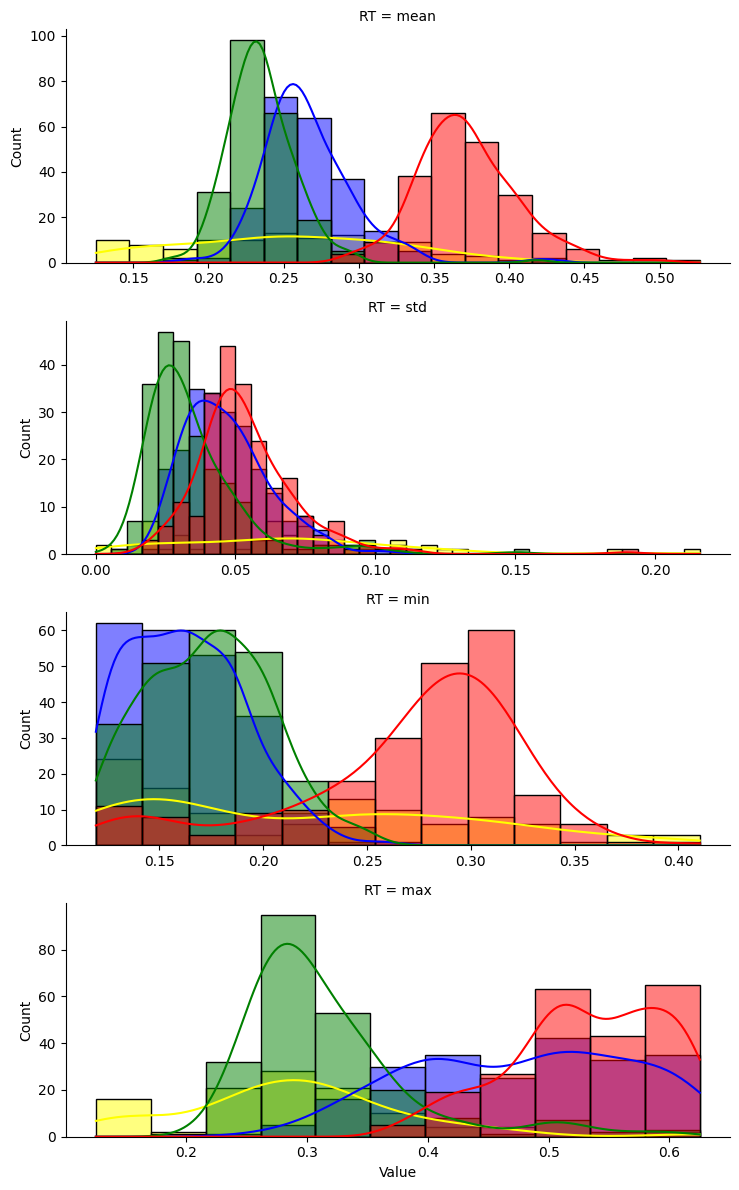

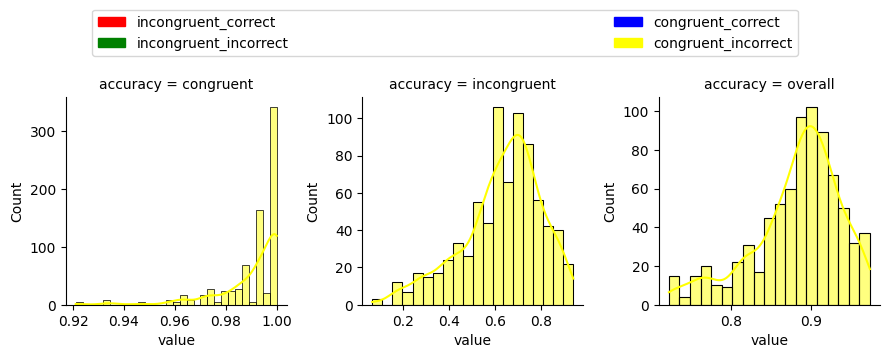

Congruent accuracy: 0.99 (0.01)
Incongruent accuracy: 0.63 (0.17)
Overall accuracy: 0.88 (0.06)


In [55]:
plt.figure(figsize=(24,10))
plt.rcParams['savefig.dpi'] = 300

# Define the custom labels and corresponding colors from `hue_palette`
custom_labels = ["incongruent_correct", "incongruent_incorrect", "congruent_correct", "congruent_incorrect"]
custom_colors = ["red", "green", "blue", "yellow"]

# Create custom legend handles
legend_elements = [
    mpatches.Patch(color=color, label=label)
    for label, color in zip(custom_labels, custom_colors)
]

participant_level_stats = final_sample_df.groupby(['ID', 'trial_reaction'])['rt'].describe()
melted_df = participant_level_stats.reset_index()[['ID', 'trial_reaction', 'mean', 'std', 'min', 'max']]
melted_df = pd.melt(melted_df, id_vars=['ID', 'trial_reaction'], var_name='RT', value_name='Value')

hue_order = ["-1.0_1.0", "-1.0_-1.0", "1.0_1.0", "1.0_-1.0"]

g1 = sns.FacetGrid(
    melted_df.sort_values(['ID', 'trial_reaction']),
    col="RT",
    col_wrap=1,
    sharex=False,
    sharey=False,
    aspect=2.5
)

g1.map_dataframe(
    sns.histplot,
    x="Value",
    kde=True,
    hue='trial_reaction',
    hue_order=hue_order,
    palette=custom_colors
)


g2 = sns.FacetGrid(
    acc_df.sort_values(['ID']),
    col="accuracy",
    col_wrap=3,
    sharex=False,
    sharey=False,
)

g2.map_dataframe(
    sns.histplot,
    x="value",
    kde=True,
    color='yellow',
)

# Get the figure and add the legend above the FacetGrid
fig = plt.gcf()

fig.legend(
    handles=legend_elements,
    title=None,
    bbox_to_anchor=(0.1, 1 ,0.8 ,-1),
    loc='lower right',
    ncol=2,
    mode='expand'
)

plt.show() 

print(f'Congruent accuracy: {np.mean(participants_congruent_acc):.2f} ({np.std(participants_congruent_acc):.2f})')
print(f'Incongruent accuracy: {np.mean(participants_incongruent_acc):.2f} ({np.std(participants_incongruent_acc):.2f})')
print(f'Overall accuracy: {np.mean(participants_overall_acc):.2f} ({np.std(participants_overall_acc):.2f})')

### 3. Check RTs and number of trials in the final sample

**With aggregation within participants**

- error vs correct RT

In [56]:
participant_means = final_sample_df.groupby(['ID'])[['rt']].mean().reset_index()

print(f"RT distribution across correctness and conditions:")
display(participant_means[['rt']].describe())

participant_means = final_sample_df.groupby(['ID', 'acc'])['rt'].mean().reset_index()
print(f"RT distribution in correct and incorrect trials:")
display(participant_means.groupby('acc')['rt'].describe())

ttest_rel(
    participant_means[participant_means['acc'] == -1]['rt'].to_numpy(),
    participant_means[participant_means['acc'] == 1]['rt'].to_numpy(),
    nan_policy='omit'
)

RT distribution across correctness and conditions:


,rt
count,222.000000
mean,0.282482
std,0.032518
min,0.185684
25%,0.264951
50%,0.278432
75%,0.301589
max,0.440957


RT distribution in correct and incorrect trials:


,count,mean,std,min,25%,50%,75%,max
acc,,,,,,,,
-1.0,222.0,0.236826,0.027990,0.176190,0.221423,0.234223,0.247520,0.483357
1.0,222.0,0.288001,0.032214,0.189244,0.270777,0.284826,0.306078,0.444949


TtestResult(statistic=-39.98778796467779, pvalue=3.749224705127767e-103, df=221)

- incongruent vs congruent correct RT

In [57]:
participant_means = final_sample_df[final_sample_df['acc'] == 1].groupby(['ID', 'condition'])['rt'].mean().reset_index()
print(f"Correct RT distribution in congruent and incongruent trials:")
display(participant_means.groupby('condition')['rt'].describe())

ttest_rel(
    participant_means[participant_means['condition'] == -1]['rt'].to_numpy(),
    participant_means[participant_means['condition'] == 1]['rt'].to_numpy(),
    nan_policy='omit'
)

Correct RT distribution in congruent and incongruent trials:


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
-1.0,222.0,0.371711,0.032909,0.294617,0.349815,0.368926,0.389968,0.501890
1.0,222.0,0.265989,0.030271,0.186242,0.247386,0.261620,0.282242,0.427433


TtestResult(statistic=69.15098216383365, pvalue=1.0732675645468206e-151, df=221)

- Number of trials in the analysis

In [58]:
# Count the number of errors and correct responses for each participant
error_correct_counts = final_sample_df.groupby(['ID', 'acc']).size().unstack(fill_value=0)
error_correct_counts.columns = ['errors', 'correct']

average_counts = error_correct_counts.describe()
print(f"Number of corerct and error trials in the analysis:")
display(average_counts)

Number of corerct and error trials in the analysis:


,errors,correct
count,222.000000,222.000000
mean,24.945946,202.166667
std,8.261931,37.463637
min,5.000000,107.000000
25%,19.250000,180.000000
50%,25.000000,207.500000
75%,31.000000,227.750000
max,42.000000,276.000000


### 4. Check ERN and CRN amplitudes in the final sample

**With aggregation within participants**

- error vs correct

In [59]:
participant_means = final_sample_df.groupby(['ID'])['ne_FCz'].mean().reset_index()
display(participant_means[['ne_FCz']].describe())

participant_means = final_sample_df.groupby(['ID', 'acc'])['ne_FCz'].mean().reset_index()
display(participant_means.groupby('acc')['ne_FCz'].describe())

ttest_rel(
    participant_means[participant_means['acc'] == -1]['ne_FCz'].to_numpy(),
    participant_means[participant_means['acc'] == 1]['ne_FCz'].to_numpy(),
    nan_policy='omit'
)

,ne_FCz
count,222.000000
mean,-7.417716
std,4.148680
min,-29.683760
25%,-9.460045
50%,-7.051939
75%,-4.525730
max,0.548734


,count,mean,std,min,25%,50%,75%,max
acc,,,,,,,,
-1.0,222.0,-15.443821,7.800369,-43.821807,-20.206744,-14.523435,-9.817540,-1.846447
1.0,222.0,-6.405409,4.111894,-28.008140,-8.640027,-6.148234,-3.785061,2.516980


TtestResult(statistic=-20.80908826533481, pvalue=5.629619349966054e-54, df=221)